# Project: Wrangle and Analyze Data

In [1]:
#Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import datetime
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Data Wrangling

### Gather

1. Enhanced Twitter Archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Image Predictions File

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

3. Twitter API

In [5]:
#create an API object to gather twitter data

consumer_key = 'dYoyhw9EBxSQM0zkdbIxRUkUj'
consumer_secret = 'hMtDPqpE4lNlUjbPODgMZsgBZASAJHIpFMoelKpQuxP2ntBSvv'
access_token = '2800345764-ZOfVnEIJ44ff2eZ7dBamlf4LbQoB27wLPH4ccoy'
access_secret = '1BJhRaD6lbIN20iWde8cDQ9WvimVTF65hkCq59ETpvCMy'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [6]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
#fails_dic keeps track of tweets that we fail to extract via API
count = 0
fails_dic = {}
t0 = time.time()
with open('tweet_json.txt', 'w') as f:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ':' + str(tweet_id))
        try: 
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print('Success')
            json.dump(tweet._json, f)
            f.write('\n')
        except Exception as e:
            print('Fail')
            fails_dic[tweet_id] = e
t1 = time.time()
total = t1 - t0

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Success
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success
295:837482249356513284
Success
296:837471256429613056
Success
297:837366284874571778
Fail
298:837110210464448512
Success
299:837012587749474308
Fail
300:836989968035819520
Success
301:836753516572119041
Success
302:836677758902222849
Success
303:83

Success
536:807059379405148160
Success
537:807010152071229440
Success
538:806629075125202948
Success
539:806620845233815552
Success
540:806576416489959424
Success
541:806542213899489280
Success
542:806242860592926720
Success
543:806219024703037440
Success
544:805958939288408065
Success
545:805932879469572096
Success
546:805826884734976000
Success
547:805823200554876929
Success
548:805520635690676224
Success
549:805487436403003392
Success
550:805207613751304193
Success
551:804738756058218496
Success
552:804475857670639616
Success
553:804413760345620481
Success
554:804026241225523202
Success
555:803773340896923648
Success
556:803692223237865472
Success
557:803638050916102144
Success
558:803380650405482500
Success
559:803321560782307329
Success
560:803276597545603072
Success
561:802952499103731712
Success
562:802624713319034886
Success
563:802600418706604034
Success
564:802572683846291456
Success
565:802323869084381190
Success
566:802265048156610565
Success
567:802247111496568832
Fail
568

Success
801:772615324260794368
Success
802:772581559778025472
Success
803:772193107915964416
Success
804:772152991789019136
Success
805:772117678702071809
Success
806:772114945936949249
Success
807:772102971039580160
Success
808:771908950375665664
Success
809:771770456517009408
Success
810:771500966810099713
Success
811:771380798096281600
Success
812:771171053431250945
Success
813:771136648247640064
Success
814:771102124360998913
Success
815:771014301343748096
Success
816:771004394259247104
Success
817:770787852854652928
Success
818:770772759874076672
Success
819:770743923962707968
Fail
820:770655142660169732
Success
821:770414278348247044
Success
822:770293558247038976
Success
823:770093767776997377
Success
824:770069151037685760
Success
825:769940425801170949
Success
826:769695466921623552
Success
827:769335591808995329
Success
828:769212283578875904
Success
829:768970937022709760
Success
830:768909767477751808
Success
831:768855141948723200
Success
832:768609597686943744
Success
833

Success
1064:741067306818797568
Success
1065:740995100998766593
Success
1066:740711788199743490
Success
1067:740699697422163968
Success
1068:740676976021798912
Success
1069:740373189193256964
Success
1070:740365076218183684
Success
1071:740359016048689152
Success
1072:740214038584557568
Success
1073:739979191639244800
Success
1074:739932936087216128
Success
1075:739844404073074688
Success
1076:739623569819336705
Success
1077:739606147276148736
Success
1078:739544079319588864
Success
1079:739485634323156992
Success
1080:739238157791694849
Success
1081:738891149612572673
Success
1082:738885046782832640
Success
1083:738883359779196928
Success
1084:738537504001953792
Success
1085:738402415918125056
Success
1086:738184450748633089
Success
1087:738166403467907072
Success
1088:738156290900254721
Success
1089:737826014890496000
Success
1090:737800304142471168
Success
1091:737678689543020544
Success
1092:737445876994609152
Success
1093:737322739594330112
Success
1094:737310737551491075
Success


Success
1321:706346369204748288
Success
1322:706310011488698368
Success
1323:706291001778950144
Success
1324:706265994973601792
Success
1325:706169069255446529
Success
1326:706166467411222528
Success
1327:706153300320784384
Success
1328:705975130514706432
Success
1329:705970349788291072
Success
1330:705898680587526145
Success
1331:705786532653883392
Success
1332:705591895322394625
Success
1333:705475953783398401
Success
1334:705442520700944385
Success
1335:705428427625635840
Success
1336:705239209544720384
Success
1337:705223444686888960
Success
1338:705102439679201280
Success
1339:705066031337840642
Success
1340:704871453724954624
Success
1341:704859558691414016
Success
1342:704847917308362754
Success
1343:704819833553219584
Success
1344:704761120771465216
Success
1345:704499785726889984
Success
1346:704491224099647488
Success
1347:704480331685040129
Success
1348:704364645503647744
Success
1349:704347321748819968
Success
1350:704134088924532736
Success
1351:704113298707505153
Success


Success
1579:687317306314240000
Success
1580:687312378585812992
Success
1581:687127927494963200
Success
1582:687124485711986689
Success
1583:687109925361856513
Success
1584:687102708889812993
Success
1585:687096057537363968
Success
1586:686947101016735744
Success
1587:686760001961103360
Success
1588:686749460672679938
Success
1589:686730991906516992
Success
1590:686683045143953408
Success
1591:686618349602762752
Success
1592:686606069955735556
Success
1593:686394059078897668
Success
1594:686386521809772549
Success
1595:686377065986265092
Success
1596:686358356425093120
Success
1597:686286779679375361
Success
1598:686050296934563840
Success
1599:686035780142297088
Success
1600:686034024800862208
Success
1601:686007916130873345
Success
1602:686003207160610816
Success
1603:685973236358713344
Success
1604:685943807276412928
Success
1605:685906723014619143
Success
1606:685681090388975616
Success
1607:685667379192414208
Success
1608:685663452032069632
Success
1609:685641971164143616
Success


Success
1834:676146341966438401
Success
1835:676121918416756736
Success
1836:676101918813499392
Success
1837:676098748976615425
Success
1838:676089483918516224
Success
1839:675898130735476737
Success
1840:675891555769696257
Success
1841:675888385639251968
Success
1842:675878199931371520
Success
1843:675870721063669760
Success
1844:675853064436391936
Success
1845:675849018447167488
Success
1846:675845657354215424
Success
1847:675822767435051008
Success
1848:675820929667219457
Success
1849:675798442703122432
Success
1850:675781562965868544
Success
1851:675740360753160193
Success
1852:675710890956750848
Success
1853:675707330206547968
Success
1854:675706639471788032
Success
1855:675534494439489536
Success
1856:675531475945709568
Success
1857:675522403582218240
Success
1858:675517828909424640
Success
1859:675501075957489664
Success
1860:675497103322386432
Success
1861:675489971617296384
Success
1862:675483430902214656
Success
1863:675432746517426176
Success
1864:675372240448454658
Success


Success
2091:670786190031921152
Success
2092:670783437142401025
Success
2093:670782429121134593
Success
2094:670780561024270336
Success
2095:670778058496974848
Success
2096:670764103623966721
Success
2097:670755717859713024
Success
2098:670733412878163972
Success
2099:670727704916926465
Success
2100:670717338665226240
Success
2101:670704688707301377
Success
2102:670691627984359425
Success
2103:670679630144274432
Success
2104:670676092097810432
Success
2105:670668383499735048
Success
2106:670474236058800128
Success
2107:670468609693655041
Success
2108:670465786746662913
Success
2109:670452855871037440
Success
2110:670449342516494336
Success
2111:670444955656130560
Success
2112:670442337873600512
Success
2113:670435821946826752
Success
2114:670434127938719744
Success
2115:670433248821026816
Success
2116:670428280563085312
Success
2117:670427002554466305
Success
2118:670421925039075328
Success
2119:670420569653809152
Success
2120:670417414769758208
Success
2121:670411370698022913
Success


Success
2348:666057090499244032
Success
2349:666055525042405380
Success
2350:666051853826850816
Success
2351:666050758794694657
Success
2352:666049248165822465
Success
2353:666044226329800704
Success
2354:666033412701032449
Success
2355:666029285002620928
Success
2356:666020888022790149
Success


In [13]:
print('Elapsed Time: {}'.format(str(datetime.timedelta(seconds = total))))

Elapsed Time: 0:31:57.796316


In [21]:
#checking the number of tweets that could not been retrieved
len(fails_dic)

24

In [29]:
#trying to download these tweets again
count = 0
fail_count = 0
for tweet_id in fails_dic.keys():
    count += 1
    print(str(count) + ':' + str(tweet_id)) 
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        print('Success')
    except Exception as e:
        print('Fail')
        fail_count += 1
print('\n')
print('{} tweets failed to download again'.format(fail_count))

1:888202515573088257
Fail
2:873697596434513921
Fail
3:872668790621863937
Fail
4:872261713294495745
Fail
5:869988702071779329
Fail
6:866816280283807744
Fail
7:861769973181624320
Fail
8:856602993587888130
Fail
9:851953902622658560
Fail
10:845459076796616705
Fail
11:844704788403113984
Fail
12:842892208864923648
Fail
13:837366284874571778
Fail
14:837012587749474308
Fail
15:829374341691346946
Fail
16:827228250799742977
Fail
17:812747805718642688
Fail
18:802247111496568832
Fail
19:779123168116150273
Fail
20:775096608509886464
Fail
21:770743923962707968
Fail
22:760153949710192640
Fail
23:754011816964026368
Fail
24:680055455951884288
Fail


24 tweets failed to download again


Once again, the retrieval of the same 24 tweets failed.

In [7]:
#reading json file line by line to create a pandas DataFrame
#create the DataFrame using a list of dictionaries
df_list = []
with open('tweet_json.txt', encoding = 'utf-8') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        full_text = tweet['full_text']
        retweeted = tweet['retweeted']
        df_list.append({'tweet_id' : tweet_id,
                        'retweet_count' : retweet_count, 
                       'favorite_count' : favorite_count, 
                       'full_text' : full_text, 
                       'retweeted' : retweeted})

In [8]:
#creating the DataFrame using df_list
twitter_api = pd.DataFrame(df_list,
                           columns = ['tweet_id', 'retweeted', 'full_text', 'retweet_count', 'favorite_count'])

### Assess

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
twitter_api

,tweet_id,retweeted,full_text,retweet_count,favorite_count
0,892420643555336193,False,This is Phineas. He's a mystical boy. Only eve...,7911,37059
1,892177421306343426,False,This is Tilly. She's just checking pup on you....,5878,31893
2,891815181378084864,False,This is Archie. He is a rare Norwegian Pouncin...,3881,24005
3,891689557279858688,False,This is Darla. She commenced a snooze mid meal...,8072,40381
4,891327558926688256,False,This is Franklin. He would like you to stop ca...,8748,38606
5,891087950875897856,False,Here we have a majestic great white breaching ...,2909,19403
6,890971913173991426,False,Meet Jax. He enjoys ice cream so much he gets ...,1926,11318
7,890729181411237888,False,When you watch your owner call another dog a g...,17650,62504
8,890609185150312448,False,This is Zoey. She doesn't want to be one of th...,4007,26698
9,890240255349198849,False,This is Cassie. She is a college pup. Studying...,6883,30574


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 5 columns):
tweet_id          2332 non-null int64
retweeted         2332 non-null bool
full_text         2332 non-null object
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
twitter_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.332000e+03,2332.000000,2332.000000
mean,7.419201e+17,2786.566467,7732.052744
std,6.821966e+16,4715.196937,11999.718363
min,6.660209e+17,1.000000,0.000000
25%,6.782728e+17,560.750000,1345.250000
50%,7.183508e+17,1304.500000,3368.500000
75%,7.986673e+17,3241.000000,9485.500000
max,8.924206e+17,80037.000000,160104.000000


In [18]:
twitter_archive.shape

(2356, 17)

In [19]:
image_predictions.shape

(2075, 12)

In [20]:
twitter_api.shape

(2332, 5)

In [21]:
twitter_archive[twitter_archive.text.str.startswith('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


- There are 181 retweets.
- You only want original ratings (no retweets) that have images.

In [22]:
for tweet in twitter_archive.text:
    print(tweet)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

- the text of the tweet also includes the url.

In [23]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
the                 8
Sadie               8
Buddy               7
Toby                7
an                  7
Bailey              7
Daisy               7
Leo                 6
Jack                6
Stanley             6
Bella               6
Milo                6
Koda                6
Scout               6
Jax                 6
Oscar               6
Rusty               6
Dave                6
George              5
                 ... 
Roscoe              1
Brandonald          1
Hermione            1
Shelby              1
Shakespeare         1
Aiden               1
Alejandro           1
Barney              1
Raphael             1
Michelangelope      1
Harry               1
Heinrich            1
Opie                1
Tug                 1
Puff      

In [24]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [27]:
for tweet in twitter_archive[twitter_archive.rating_denominator != 10][['text']].values:
    print(tweet)

[ "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]
['@docmisterio account started on 11/15/15']
[ 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd']
[ 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']
[ 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…']
[ 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE']
[ 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ']
[ 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv']
['Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a']

In [28]:
(image_predictions.p1_conf > image_predictions.p2_conf).all()

True

In [29]:
(image_predictions.p2_conf > image_predictions.p3_conf).all()

True

#### Quality

##### `twitter _archive` table
1. there are 181 retweets
2. Erroneous data type (*timestamp* column)
3. two variables in one column (the *text* column contains both the tweet text and url)
4. missing values in the *name* column
5. inaccurate values in the *name* column ('the', 'an', 'a', 'quite')
6. inaccurate ratings in the (*rating_numerator* column and the *rating_denominator* column)
7. missing total rating column (*rating_numerator* / *rating_denominator*)
##### `image_predictions` table
1. the *p1*, *p2*, *p3* columns have '_' instead of spaces
2. some predictions are not for dogs
3. non descriptive column name (*jpg_url*) 

##### `twitter_api` table
n/a

#### Tidiness

##### `twitter _archive` table
1. unnecessary columns (*source*, *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*)
2. column headers are values and not a variable name (*doggo*, *floofer*, *pupper*, *puppo*)

##### `image_predictions` table
1. unnecessary columns
2. this table should be part of the twitter_archive table to filter tweets

##### `twitter_api` table
1. the table should be part of twitter_archive table


## Clean

In [273]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()

### Quality

### `twitter_archive_clean` table

#### there are 181 retweets

##### Define
drop all of the tweets that begins with "RT @"

##### Code

In [274]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.retweeted_status_id.isna())]

In [275]:
twitter_archive_clean = twitter_archive_clean.reset_index(drop = True)

##### Test

In [276]:
twitter_archive_clean[twitter_archive_clean.text.str.startswith('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Erroneous data type (timestamp column)

##### Define
change the data type of the *timestamp* column from object to datetime

##### Code

In [277]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test

In [278]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

#### two variables in one column (the text column contains both the tweet text and url)

##### Define
the urls should be replaced out so that the *text* column only includes the text of the tweet.

##### Code

In [279]:
url_list = []
for tweet in twitter_archive_clean.text.values:
    index = tweet.find('https')
    if index > 0:
        url_list.append(tweet[index:])
    else:
        url_list.append('')

In [280]:
for i in range(twitter_archive_clean.shape[0]):
    twitter_archive_clean['text'] = twitter_archive_clean['text'].apply(lambda x : x.replace(url_list[i], ''))

##### Test

In [281]:
for tweet in twitter_archive_clean['text']:
    print(tweet)
    print('\n')

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 


This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 


This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 


This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 


This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 


Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 


Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below




When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 


This is Zoey. She doesn't want to b



This is Lorelei. She's contemplating her existence and the eventual heat death of the universe. 11/10 very majestic 


This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all 


This is Olive. He's stuck in a sleeve. 9/10 damn it Olive 


Jack deserves another round of applause. If you missed this earlier today I strongly suggest reading it. Wonderful first 14/10 🐶❤️


This is Marty. He has no idea what happened here. Never seen this stuff in his life. 9/10 very suspicious pupper 


Meet Brooks. He's confused by the almighty ball of tennis. 12/10 

(vid by @PDolan37) 


This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10 


Everybody needs to read this. Jack is our first 14/10. Truly heroic pupper 


For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 


"Tristan do not speak to me with that kind of tone or I will take away the Xbox." 

#### missing values in the name column

#### Define
search for names in the *text* columns that follow the word "named", then extract and add them to the *name* column

#### Code

In [282]:
missing_names = []
for tweet in twitter_archive_clean[twitter_archive_clean.name.isin(['a', 'the', 'quite', 'an','None'])]['text']:
    ind = tweet.find('named')
    if ind > 0:
        name = tweet[ind:].split()[1].replace('.','')
        missing_names.append(name)

In [283]:
twitter_archive_clean.loc[(twitter_archive_clean.name.isin(['a', 'the', 'quite', 'an','None'])) &
                      (twitter_archive_clean.text.str.find('named') > 0), 'name'] = missing_names

#### Test

In [284]:
twitter_archive_clean.name.value_counts()

None              677
a                  36
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Penny               9
Tucker              9
Sadie               8
the                 8
Lola                8
Winston             8
Toby                7
Daisy               7
Oscar               6
Koda                6
Stanley             6
Jax                 6
Bailey              6
Bo                  6
Bella               6
an                  5
Bentley             5
Chester             5
Milo                5
Rusty               5
Leo                 5
Louis               5
Scout               5
Buddy               5
                 ... 
Yukon               1
Grizz               1
Zuzu                1
Mark                1
Millie              1
Bloo                1
Jareld              1
Stefan              1
Dewey               1
Noosh               1
Leroi               1
Julio               1
Arya                1
Sundance            1
Kyro      

#### inaccurate values in the name column ('the', 'an', 'a', 'quite')

##### Define
replace the incorrect name values in the *name* column with nan

##### Code

In [285]:
twitter_archive_clean.loc[twitter_archive_clean.name.isin(['a', 'the', 'quite', 'an','None', 'by']), 'name'] = np.nan

##### Test

In [286]:
twitter_archive_clean.name.value_counts()

Charlie           11
Lucy              11
Cooper            10
Oliver            10
Penny              9
Tucker             9
Winston            8
Sadie              8
Lola               8
Toby               7
Daisy              7
Jax                6
Bella              6
Stanley            6
Oscar              6
Bailey             6
Bo                 6
Koda               6
Louis              5
Dave               5
Buddy              5
Scout              5
Chester            5
Leo                5
Bentley            5
Rusty              5
Milo               5
George             4
Jeffrey            4
Scooter            4
                  ..
Fwed               1
Burt               1
Dylan              1
Raphael            1
Odin               1
Ace                1
Sundance           1
Biden              1
Chompsky           1
Rontu              1
Bloo               1
Stefan             1
Dewey              1
Noosh              1
Leroi              1
Julio              1
Arya         

#### inaccurate ratings in the (rating_numerator column and the rating_denominator column)

##### Define
- Reextract the rating_numerator and rating_denominator values from the *text* colum
- change the rating of tweet_id = '722974582966214656' from 4/20 to 13/10
- change the rating of tweet_id = '716439118184652801' from 4/20 to 11/10
- change the rating of tweet_id = '682808988178739200' from 0/0 to 20/16

##### Code

In [287]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean.text.str.extract(r'([1234567890]+)\/([123456789]+0)')

In [288]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682808988178739200, 'rating_denominator'] = 20
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682808988178739200, 'rating_numerator'] = 16

In [289]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2173 non-null object
rating_denominator            2173 non-null object
name                          1445 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), f

In [290]:
twitter_archive_clean['rating_numerator'] = pd.to_numeric(twitter_archive_clean['rating_numerator'], errors = 'coerce')

In [291]:
twitter_archive_clean['rating_denominator'] = pd.to_numeric(twitter_archive_clean['rating_denominator'], errors = 'coerce')

##### Test

In [292]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2173 non-null float64
rating_denominator            2173 non-null float64
name                          1445 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1),

In [293]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2157
20.0        2
50.0        2
80.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
11.0        1
13.0        1
Name: rating_denominator, dtype: int64

#### missing total rating column (*rating_numerator* / *rating_denominator*)

##### Define
add a *total_rating* column by dividing *rating_numerator_column* by *rating_denominator* column

##### Code

In [294]:
twitter_archive_clean['total_rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

##### Test

In [295]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,total_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,1.2


### `image_predictions_clean` table

#### the p1, p2, p3 columns have '_' instead of spaces

##### Define
replace the '_' in the *p1*, *p2*, *p3* columns with whitespaces 

##### Code

In [296]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

##### Test

In [297]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### some predictions are not for dogs

##### Define
- remove all records from the *image_predictions_clean* table in which all of the three predictions were False
- create a new prediction column that only contains dog predictions that are deemed True by the *p1_dog*, *p2_dog*, and *p3_dog* columns

##### Code

In [298]:
image_predictions_clean = image_predictions_clean[~((image_predictions_clean.p1_dog == False) & (image_predictions_clean.p2_dog == False)
                       & (image_predictions_clean.p3_dog == False))]

In [299]:
p1 = list(image_predictions_clean.p1)
p2 = list(image_predictions_clean.p2)
p3 = list(image_predictions_clean.p3)
p1_dog = list(image_predictions_clean.p1_dog)
p2_dog = list(image_predictions_clean.p2_dog)
p3_dog = list(image_predictions_clean.p3_dog)

In [300]:
def predictions(p1, p1_dog, p2, p2_dog, p3, p3_dog):
    prediction = []
    for i in range(image_predictions_clean.shape[0]):
        if p1_dog[i] == True:
            prediction.append(p1[i])
        elif p1_dog[i] == False and p2_dog[i] == True:
            prediction.append(p2[i])
        elif p1_dog[i] == False and p2_dog[i] == False and p3_dog[i] == True:
            prediction.append(p3[i])
    return prediction

In [301]:
image_predictions_clean['prediction'] = predictions(p1, p1_dog, p2, p2_dog, p3, p3_dog)

##### Test

In [302]:
image_predictions_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French bulldog,0.099984,True,printer,0.077130,False,French bulldog
694,684241637099323392,https://pbs.twimg.com/media/CX7qIcdWcAELJ7N.jpg,1,Pembroke,0.508498,True,black-footed ferret,0.115532,False,weasel,0.051280,False,Pembroke
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon griffon,0.058365,True,Rottweiler,0.055114,True,chow
755,688385280030670848,https://pbs.twimg.com/media/CY2iwGNWUAI5zWi.jpg,2,golden retriever,0.900437,True,cocker spaniel,0.022292,True,sombrero,0.014997,False,golden retriever
1363,761334018830917632,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,1,Norwegian elkhound,0.822936,True,malinois,0.086152,True,German shepherd,0.063333,True,Norwegian elkhound
958,705475953783398401,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1,golden retriever,0.908784,True,Labrador retriever,0.030361,True,tennis ball,0.004996,False,golden retriever
422,674051556661161984,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1,Shih-Tzu,0.179777,True,badger,0.160580,False,three-toed sloth,0.132154,False,Shih-Tzu
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian husky,0.136366,True,Pembroke
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur coat,0.236391,False,kuvasz,0.038243,True,kuvasz
548,677334615166730240,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland terrier,0.859392,True,Airedale,0.067292,True,Irish water spaniel,0.049531,True,Lakeland terrier


In [303]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id      1751 non-null int64
jpg_url       1751 non-null object
img_num       1751 non-null int64
p1            1751 non-null object
p1_conf       1751 non-null float64
p1_dog        1751 non-null bool
p2            1751 non-null object
p2_conf       1751 non-null float64
p2_dog        1751 non-null bool
p3            1751 non-null object
p3_conf       1751 non-null float64
p3_dog        1751 non-null bool
prediction    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 155.6+ KB


#### non descriptive column name (*jpg_url*)

##### Define
change the column name into something more descriptive like image_url

##### Code

In [304]:
image_predictions_clean.rename({'jpg_url' : 'image_url'}, axis = 1, inplace = True)

##### Test

In [305]:
image_predictions_clean.columns

Index(['tweet_id', 'image_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'prediction'],
      dtype='object')

### Tidiness

### `twitter_archive_clean` table

#### unnecessary columns (source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

##### Define
drop all unnecessary columns

##### Code

In [306]:
twitter_archive_clean.drop(columns = {'source', 'in_reply_to_status_id', 'in_reply_to_user_id', 
                                      'retweeted_status_id', 'retweeted_status_user_id',
                                      'retweeted_status_timestamp'}, axis = 1, inplace = True)

##### Test

In [307]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1445 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
total_rating          2173 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 204.0+ KB


#### column headers are values and not a variable name (doggo, floofer, pupper, puppo)

##### Define
group the three columns into one column named *stage*, and then drop them

##### Code

In [308]:
twitter_archive_clean['stage'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean.drop(columns = {'doggo', 'floofer', 'pupper', 'puppo'}, axis = 1, inplace = True)

##### Test

In [309]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1445 non-null object
total_rating          2173 non-null float64
stage                 364 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 153.0+ KB


### `image_predictions_clean` table

#### unnecessary columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

##### Define
drop these columns since they are now replaced by the *prediction* column

##### Code

In [310]:
image_predictions_clean.drop(columns = {'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'},
                            axis = 1, inplace = True)

##### Test

In [311]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id      1751 non-null int64
image_url     1751 non-null object
img_num       1751 non-null int64
prediction    1751 non-null object
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


#### this table should be part of the twitter_archive table to filter tweets

##### Define
merge `image_predictions_clean` table with `twitter_archive_clean` table on *tweet_id*

##### Code

In [312]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how = 'left')

##### Test

In [313]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'total_rating', 'stage', 'image_url',
       'img_num', 'prediction'],
      dtype='object')

### `twitter_api_clean` table

#### this table should be part of the twitter_archive table to filter tweets/


##### Define
merge `twitter_api_clean` table with `twitter_archive_clean` table on *tweet_id*

##### Code

In [314]:
twitter_archive_clean = pd.merge(twitter_archive_clean, twitter_api_clean, on = 'tweet_id', how = 'left')

##### Test

In [315]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'total_rating', 'stage', 'image_url',
       'img_num', 'prediction', 'retweeted', 'full_text', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [316]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1445 non-null object
total_rating          2173 non-null float64
stage                 364 non-null object
image_url             1686 non-null object
img_num               1686 non-null float64
prediction            1686 non-null object
retweeted             2168 non-null object
full_text             2168 non-null object
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(8)
memory usage: 288.9+ KB


### other quality issues introduced by merging
1. *full_text* column is the same as *text* column
2. erroneous data type (*retweeted* column)

#### full_text column is the same as text column

##### Define
drop the full text column because it is redundant

##### Code

In [317]:
twitter_archive_clean.drop(columns = {'full_text'}, axis = 1, inplace = True)

##### Test

In [318]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'total_rating', 'stage', 'image_url',
       'img_num', 'prediction', 'retweeted', 'retweet_count',
       'favorite_count'],
      dtype='object')

##### erroneous data type (retweeted column)

##### Define
change the data type from object to bool

##### Code

In [319]:
twitter_archive_clean['retweeted'] = twitter_archive_clean['retweeted'].fillna(False).astype(bool)

##### Test

In [320]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1445 non-null object
total_rating          2173 non-null float64
stage                 364 non-null object
image_url             1686 non-null object
img_num               1686 non-null float64
prediction            1686 non-null object
retweeted             2175 non-null bool
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 257.0+ KB


In [321]:
twitter_archive_clean.retweeted.value_counts()

False    2175
Name: retweeted, dtype: int64

## Store Data

#### store the cleaned dataframe into a csv file

In [322]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

#### store the cleaned dataframe into a sqlite database

In [323]:
engine = create_engine('sqlite:///twitter_archive_master.db')

In [324]:
twitter_archive_clean.to_sql('master', engine, index = False)

## Analysis and Visualization

In [325]:
basecolor = sb.color_palette()[0]

In [326]:
twitter_df = pd.read_csv('twitter_archive_master.csv')

In [327]:
twitter_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,total_rating,stage,image_url,img_num,prediction,retweeted,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,1.3,NaN,NaN,NaN,NaN,False,7911.0,37059.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,False,5878.0,31893.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,False,3881.0,24005.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,False,8072.0,40381.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,False,8748.0,38606.0


In [328]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1445 non-null object
total_rating          2173 non-null float64
stage                 364 non-null object
image_url             1686 non-null object
img_num               1686 non-null float64
prediction            1686 non-null object
retweeted             2175 non-null bool
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 240.1+ KB


In [329]:
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'])

In [330]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  1445 non-null object
total_rating          2173 non-null float64
stage                 364 non-null object
image_url             1686 non-null object
img_num               1686 non-null float64
prediction            1686 non-null object
retweeted             2175 non-null bool
retweet_count         2168 non-null float64
favorite_count        2168 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 240.1+ KB


### insight 1

In [331]:
breeds_count = twitter_df.prediction.value_counts()

In [332]:
breeds_order = breeds_count.index[1:15]

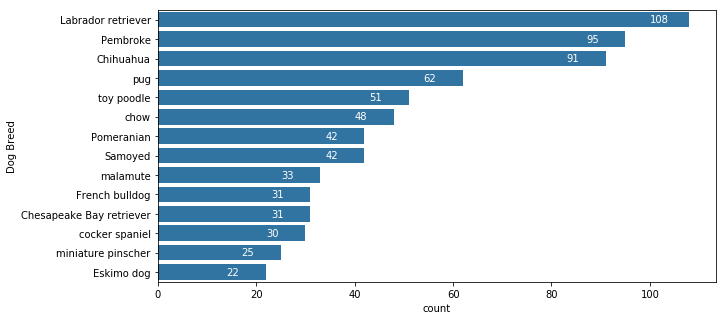

In [333]:
plt.figure(figsize = (10,5))
sb.countplot(data = twitter_df, y = 'prediction', order = breeds_order, color = basecolor)
plt.ylabel('Dog Breed')
locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    count = breeds_count[label.get_text()]
    plt.text(count - 8, loc, count, color = 'w', va = 'center');

In [363]:
mean_dogs_ratings = twitter_df.groupby('prediction')['total_rating'].agg('mean').reset_index(name = 'mean_rating').\
sort_values(by = ['mean_rating'], ascending = False)

In [364]:
mean_dogs_ratings[:15]

,prediction,mean_rating
82,clumber,2.700000
11,Bouvier des Flandres,1.300000
54,Saluki,1.250000
50,Pomeranian,1.247619
78,briard,1.233333
63,Tibetan mastiff,1.225000
9,Border terrier,1.214286
104,silky terrier,1.200000
107,standard schnauzer,1.200000
26,Gordon setter,1.175000


In [365]:
twitter_df[twitter_df.prediction == 'clumber']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,total_rating,stage,image_url,img_num,prediction,retweeted,retweet_count,favorite_count
617,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,2.7,NaN,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,False,1688.0,6800.0


**there is only one occurence of a clumber dog breed, so it will be excluded from the comparison**

In [372]:
top_15_dogs_ratings = mean_dogs_ratings[1:16]

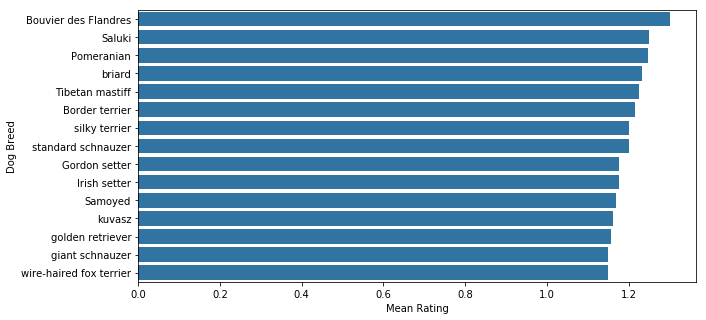

In [373]:
plt.figure(figsize = (10,5))
sb.barplot(data = top_15_dogs_ratings, x = 'mean_rating', y = 'prediction', color = basecolor)
plt.ylabel('Dog Breed')
plt.xlabel('Mean Rating');

In [376]:
total_favorites = twitter_df.groupby('prediction')['favorite_count'].sum().reset_index(name = 'total_favorites').\
sort_values(by = ['total_favorites'], ascending = False)

In [377]:
top_15_favorites = total_favorites[:15]

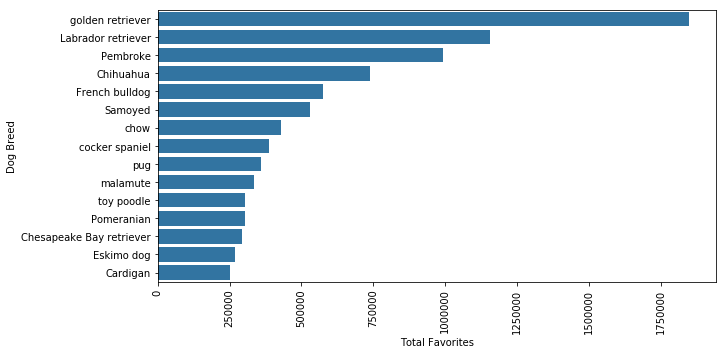

In [382]:
plt.figure(figsize = (10,5))
sb.barplot(data = top_15_favorites, x = 'total_favorites', y = 'prediction', color = basecolor)
plt.xlabel('Total Favorites')
plt.ylabel('Dog Breed')
plt.xticks(rotation = 90);

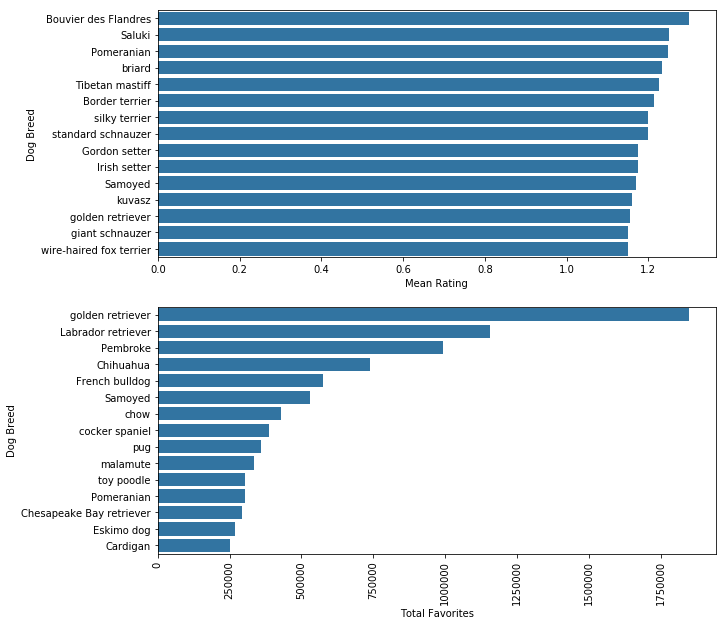

In [402]:
#gathering the two visuals in one figure
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sb.barplot(data = top_15_dogs_ratings, x = 'mean_rating', y = 'prediction', color = basecolor)
plt.ylabel('Dog Breed')
plt.xlabel('Mean Rating')
plt.subplot(2,1,2)
sb.barplot(data = top_15_favorites, x = 'total_favorites', y = 'prediction', color = basecolor)
plt.xlabel('Total Favorites')
plt.ylabel('Dog Breed')
plt.xticks(rotation = 90);

of all the dog breeds in the data set, the"Bouvier des Flandres" bread had the highest mean rating.
however, the "golden retriever" breed was the most highly favorited of all the dog breeds.
the ratings in the dataset were mostly arbitrary and did not follow a defined set of rules to rate different dogs, which is a big part of the popularity of WeRateDogs. so it is more convenient to use the favorite count as a statistical metric to figure out which dog breed is the most favored. 

### insight 2

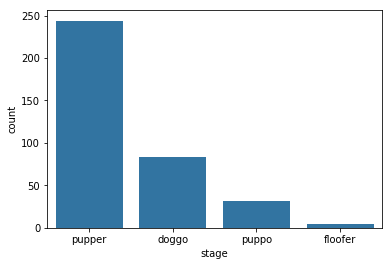

In [405]:
order = twitter_df['stage'].value_counts().index
sb.countplot(data = twitter_df, x = 'stage', color = basecolor, order = order);

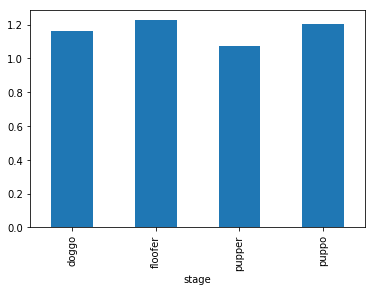

In [410]:
twitter_df.groupby('stage')['total_rating'].agg('mean').plot(kind = 'bar', color = basecolor);

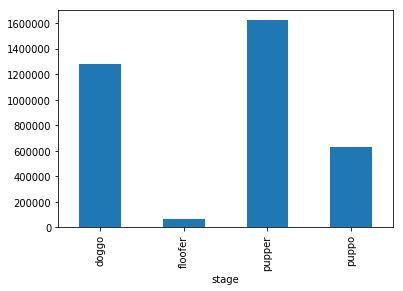

In [413]:
twitter_df.groupby('stage')['favorite_count'].agg('sum').plot(kind = 'bar', color = basecolor);

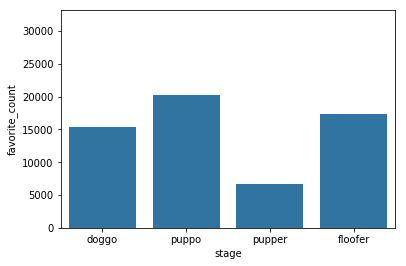

In [432]:
sb.barplot(data = twitter_df, x = 'stage', y = 'favorite_count', errwidth = 0, color = basecolor);

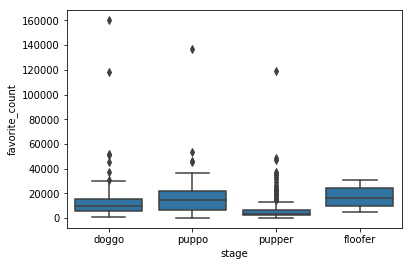

In [433]:
sb.boxplot(data = twitter_df, x = 'stage' , y= 'favorite_count', color = basecolor);

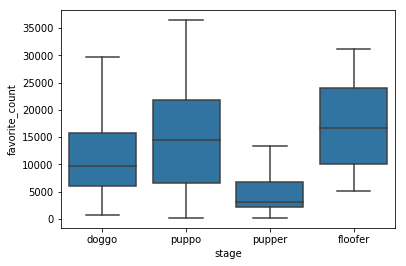

In [425]:
sb.boxplot(data = twitter_df, x = 'stage' , y= 'favorite_count', showfliers = False, color = basecolor);

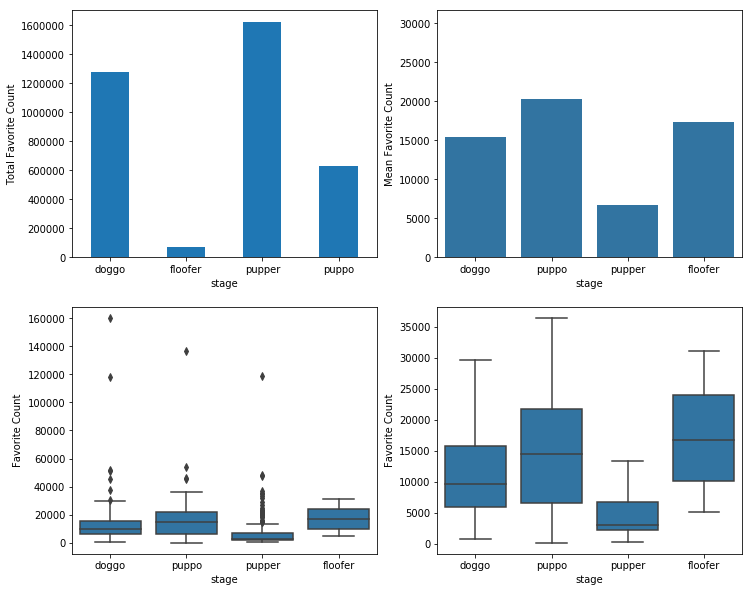

In [486]:
#gathering the visuals together
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
twitter_df.groupby('stage')['favorite_count'].agg('sum').plot(kind = 'bar', color = basecolor)
plt.ylabel('Total Favorite Count')
plt.xticks(rotation = 0)
plt.subplot(2,2,2)
sb.barplot(data = twitter_df, x = 'stage', y = 'favorite_count', errwidth = 0, color = basecolor)
plt.ylabel('Mean Favorite Count')
plt.subplot(2,2,3)
sb.boxplot(data = twitter_df, x = 'stage' , y= 'favorite_count', color = basecolor)
plt.ylabel('Favorite Count')
plt.subplot(2,2,4)
sb.boxplot(data = twitter_df, x = 'stage' , y= 'favorite_count', showfliers = False, color = basecolor)
plt.ylabel('Favorite Count');

at first glance, it seems like the "pupper" dog stage is the most favored dog since it has the hightest favorite count. but further investigation reveals that this is probably due to the existence of outliers. and this is confirmed when the stage is plotted against the mean favorite count rather than the raw favorite count. further inspection also shows that "puppo" dogs are the most favored dogs as they had the highest mean favorite count. 
looking at the box plots, we can see the impact of outliers on the interpretation of results. when the outliers are removed, the results clearly show that "puppo" dogs are the most favored while the "pupper" dogs are the least.

### insight 3

In [492]:
total_retweets = twitter_df.groupby('prediction')['retweet_count'].sum().reset_index(name = 'total_retweets')\
.sort_values(by = ['total_retweets'], ascending = False)

In [494]:
total_favorites = twitter_df.groupby('prediction')['favorite_count'].sum().reset_index(name = 'total_favorites')\
.sort_values(by = ['total_favorites'], ascending = False)

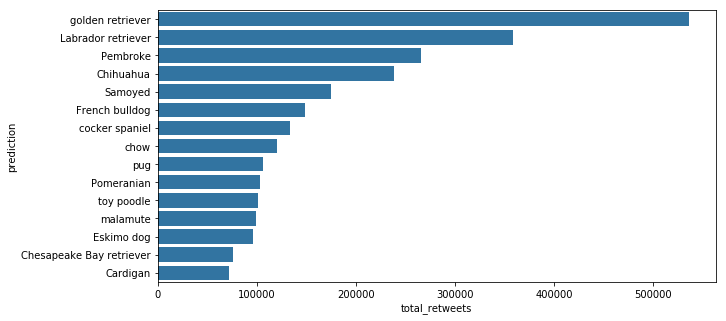

In [499]:
plt.figure(figsize = (10,5))
sb.barplot(data = total_retweets, x = 'total_retweets', y = 'prediction',
           order = total_retweets.prediction[:15], color = basecolor)

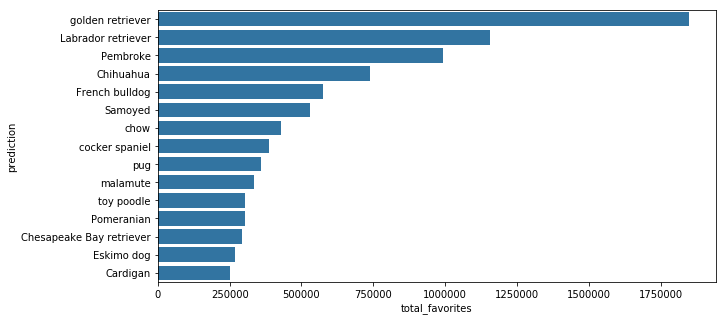

In [500]:
plt.figure(figsize = (10,5))
sb.barplot(data = total_favorites, x = 'total_favorites', y = 'prediction',
           order = total_favorites.prediction[:15], color = basecolor)

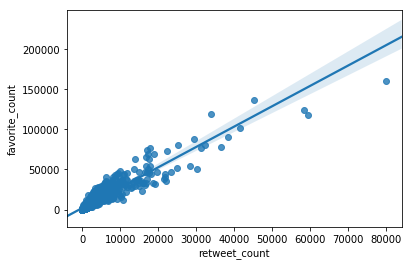

In [501]:
sb.regplot(data = twitter_df, x = 'retweet_count', y = 'favorite_count')

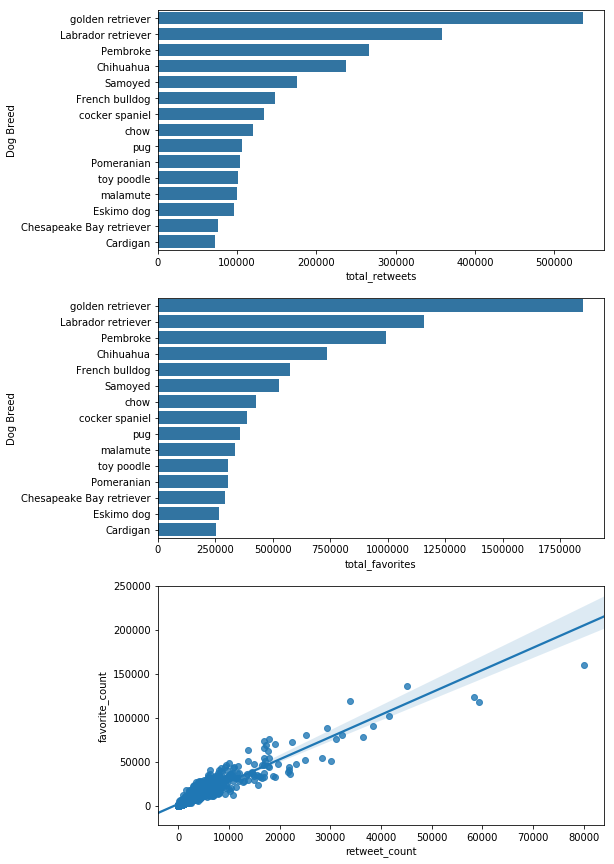

In [508]:
#gathering the visuals in one figure
plt.figure(figsize = (8,15))
plt.subplot(3,1,1)
sb.barplot(data = total_retweets, x = 'total_retweets', y = 'prediction',
           order = total_retweets.prediction[:15], color = basecolor)
plt.ylabel('Dog Breed')
plt.subplot(3,1,2)
sb.barplot(data = total_favorites, x = 'total_favorites', y = 'prediction',
           order = total_favorites.prediction[:15], color = basecolor)
plt.ylabel('Dog Breed')
plt.subplot(3,1,3)
sb.regplot(data = twitter_df, x = 'retweet_count', y = 'favorite_count');

i was trying to investigate the relationship between the number of retweets and the number of favorites. there seem to be a positive correlation between the two variables.
the "golden retriever" dog breed had the highest number of favorites as well as the highest number of retweets. this pattern stands true for the top 15 dog breeds at least.
this correlation also appears in the scatter plot as it clearly shows that there is a positive relationship between the retweet count and the favorite count.